# Sales Forecaseting
- mengidentifikasi total penjualan pada store tersebut menggunakan LSTM dan SARIMA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout, Bidirectional, GRU, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from keras.preprocessing.sequence import TimeseriesGenerator

# Metrics
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error

In [ ]:
df = pd.read_csv('store5.csv')
df['family'].value_counts()

family
AUTOMOTIVE                    1684
HOME APPLIANCES               1684
SCHOOL AND OFFICE SUPPLIES    1684
PRODUCE                       1684
PREPARED FOODS                1684
POULTRY                       1684
PLAYERS AND ELECTRONICS       1684
PET SUPPLIES                  1684
PERSONAL CARE                 1684
MEATS                         1684
MAGAZINES                     1684
LIQUOR,WINE,BEER              1684
LINGERIE                      1684
LAWN AND GARDEN               1684
LADIESWEAR                    1684
HOME CARE                     1684
HOME AND KITCHEN II           1684
BABY CARE                     1684
HOME AND KITCHEN I            1684
HARDWARE                      1684
GROCERY II                    1684
GROCERY I                     1684
FROZEN FOODS                  1684
EGGS                          1684
DELI                          1684
DAIRY                         1684
CLEANING                      1684
CELEBRATION                   1684
BREAD/BAKERY 

## Informasi Dataset

In [ ]:
df['store_nbr'].value_counts()

store_nbr
5    55572
Name: count, dtype: int64

In [ ]:
df.head()

,id,date,store_nbr,family,sales,onpromotion,dcoilwtico
0,1452,2013-01-01,5,AUTOMOTIVE,0.0,0,NaN
1,1453,2013-01-01,5,BABY CARE,0.0,0,NaN
2,1454,2013-01-01,5,BEAUTY,0.0,0,NaN
3,1455,2013-01-01,5,BEVERAGES,0.0,0,NaN
4,1456,2013-01-01,5,BOOKS,0.0,0,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55572 entries, 0 to 55571
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           55572 non-null  int64  
 1   date         55572 non-null  object 
 2   store_nbr    55572 non-null  int64  
 3   family       55572 non-null  object 
 4   sales        55572 non-null  float64
 5   onpromotion  55572 non-null  int64  
 6   dcoilwtico   38379 non-null  float64
dtypes: float64(2), int64(3), object(2)
memory usage: 3.0+ MB


In [ ]:
df['date']= pd.to_datetime(df['date'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55572 entries, 0 to 55571
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   id           55572 non-null  int64         
 1   date         55572 non-null  datetime64[ns]
 2   store_nbr    55572 non-null  int64         
 3   family       55572 non-null  object        
 4   sales        55572 non-null  float64       
 5   onpromotion  55572 non-null  int64         
 6   dcoilwtico   38379 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(3), object(1)
memory usage: 3.0+ MB


In [ ]:
df_case1 = df.groupby(pd.Grouper(key ='date')).agg({'sales':'sum'},{'onpromotion':'sum'}).reset_index()

In [ ]:
df_case1.head()

,date,sales
0,2013-01-01,0.000000
1,2013-01-02,10598.619020
2,2013-01-03,7770.968000
3,2013-01-04,7347.641991
4,2013-01-05,8192.598000


In [ ]:
df_case1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1684 entries, 0 to 1683
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    1684 non-null   datetime64[ns]
 1   sales   1684 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 26.4 KB


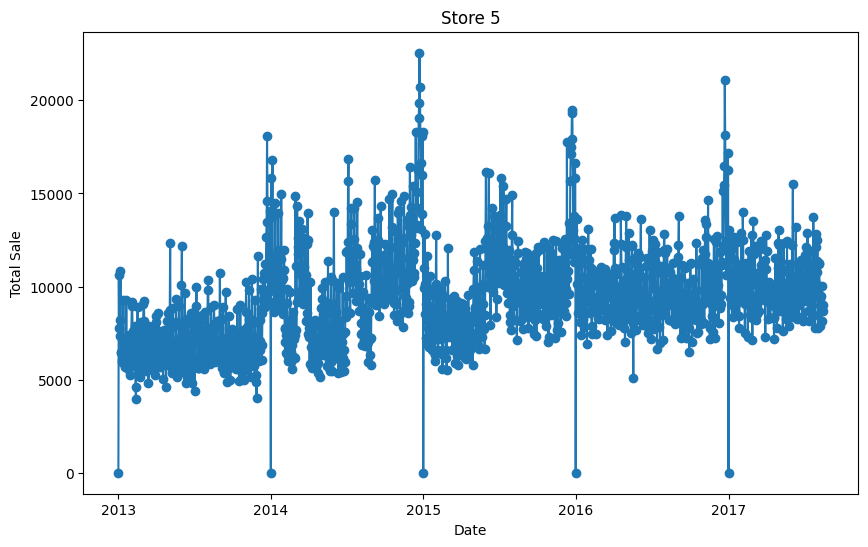

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(df_case1['date'],df_case1['sales'], marker='o')
plt.title('Store 5')
plt.xlabel('Date')
plt.ylabel('Total Sale')
plt.show()

In [ ]:
tngglmulai = '2016-01-01'
tngglslsi = '2017-12-30'
filter_df = df_case1[(df_case1['date'] >= tngglmulai)]

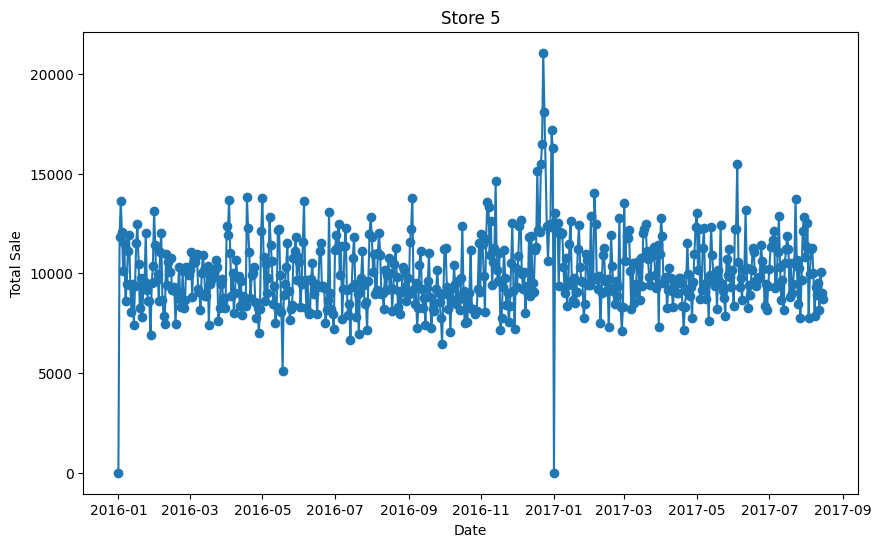

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(filter_df['date'],filter_df['sales'], marker='o')
plt.title('Store 5')
plt.xlabel('Date')
plt.ylabel('Total Sale')
plt.show()

Karena datanya terlalu panjang, kita lihat dari jarak 2 tahun.

In [ ]:
df_case1= df_case1.set_index('date')
df_case1

,sales
date,
2013-01-01,0.000000
2013-01-02,10598.619020
2013-01-03,7770.968000
2013-01-04,7347.641991
2013-01-05,8192.598000
...,...
2017-08-11,9510.871000
2017-08-12,8157.070000
2017-08-13,10044.821000


In [ ]:
df_case1 = df_case1['2016-01-02':'2017']
df_case1

,sales
date,
2016-01-02,11846.41898
2016-01-03,13640.98700
2016-01-04,12064.41598
2016-01-05,10143.74800
2016-01-06,11509.64700
...,...
2017-08-11,9510.87100
2017-08-12,8157.07000
2017-08-13,10044.82100


In [ ]:
df_case1.index = pd.date_range(start=df_case1.index[0], periods=len(df_case1), freq='D')

<Axes: >

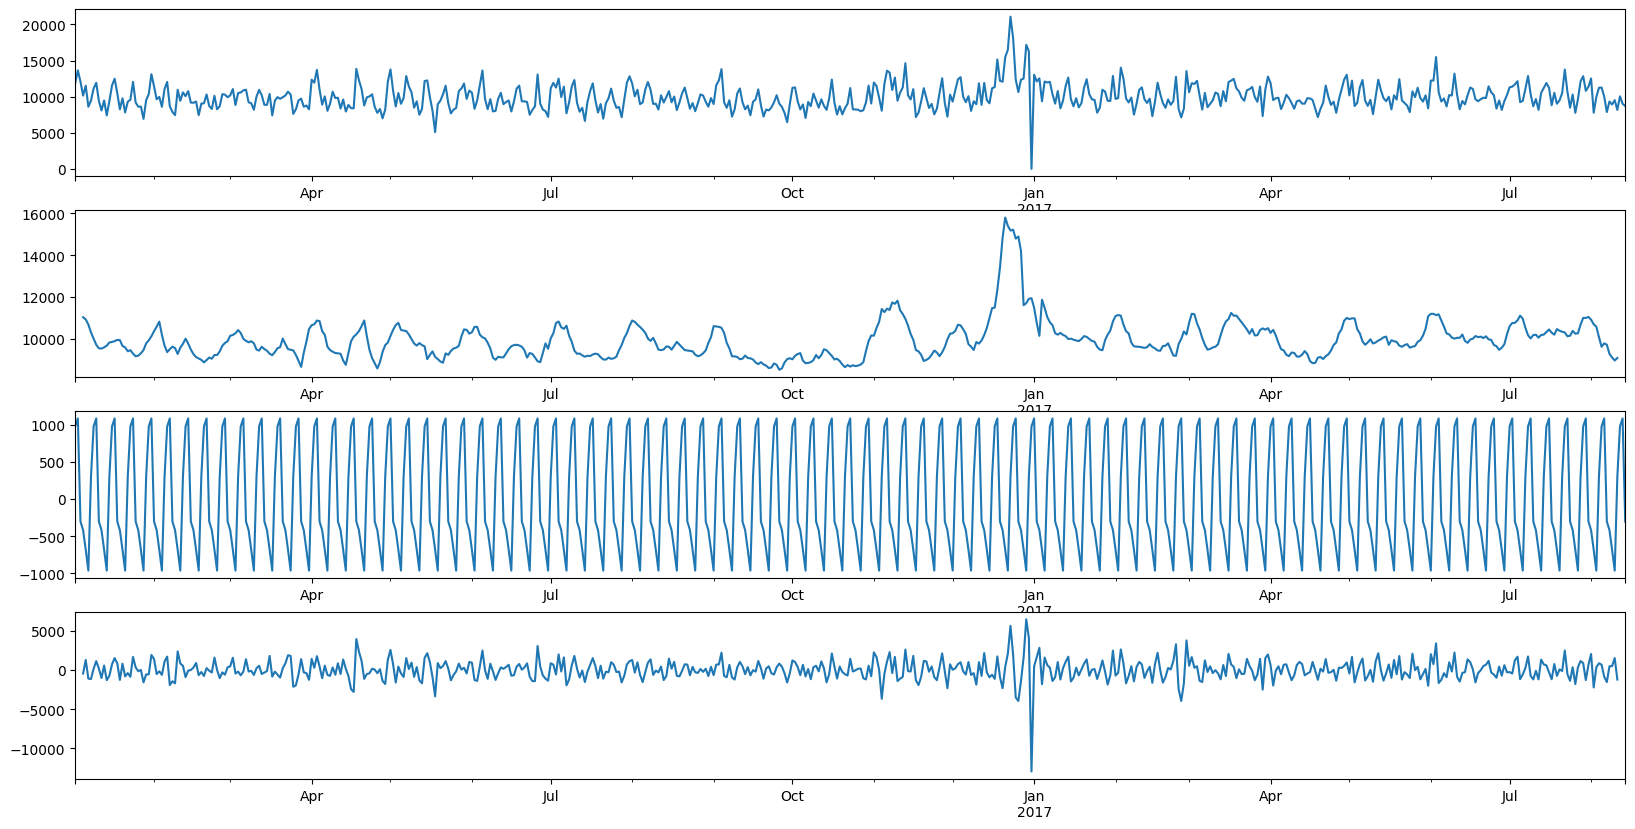

In [ ]:
plot_decompose = seasonal_decompose(df_case1['sales'], model='additive')
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(20, 10))
plot_decompose.observed.plot(ax=ax1)
plot_decompose.trend.plot(ax=ax2)
plot_decompose.seasonal.plot(ax=ax3)
plot_decompose.resid.plot(ax=ax4)


## Uji diagnostik

### Uji stationer

Adifuller test

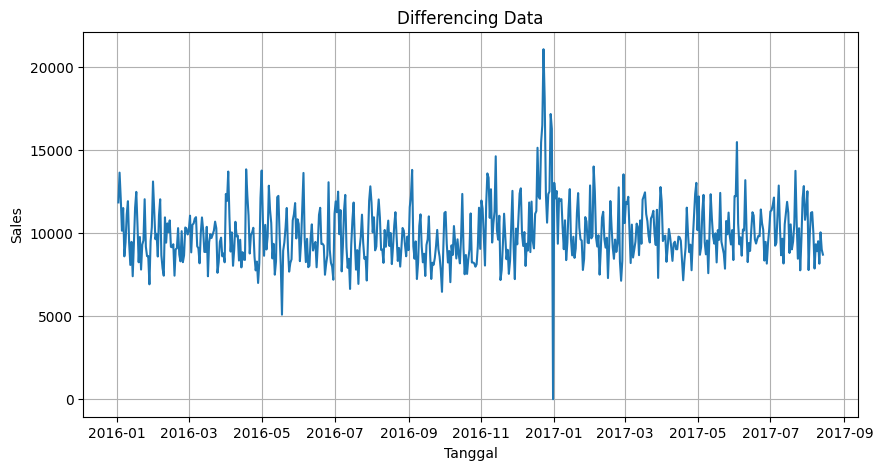

In [ ]:
df_case1['sales'].diff().dropna()
plt.figure(figsize=(10, 5))
plt.plot(df_case1['sales'].dropna())
plt.title('Differencing Data')
plt.xlabel('Tanggal')
plt.ylabel('Sales')
plt.grid(True)
plt.show()

Data sudah stasioner

### Adfuller

In [ ]:
from statsmodels.tsa.stattools import adfuller
from numpy import log
result = adfuller(df_case1['sales'].dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -4.892622
p-value: 0.000036


In [ ]:
result[1]*100

0.0036046156681517985

nilai p-value kurang dari 0.05 maka sudah cukup stationer, persentasenya juga hanya 0.003%

### KPSS

In [ ]:
from statsmodels.tsa.stattools import kpss

In [ ]:
result = kpss(df_case1['sales'], regression='c')

In [ ]:
def print_kpss_results(result):
    print('KPSS Statistic:', result[0])
    print('p-value:', result[1])
    print('Lags Used:', result[2])
    for key, value in result[3].items():
        print(f'Critical Value ({key}): {value}')

print_kpss_results(result)

KPSS Statistic: 0.5176362591903287
p-value: 0.03769453621839443
Lags Used: 6
Critical Value (10%): 0.347
Critical Value (5%): 0.463
Critical Value (2.5%): 0.574
Critical Value (1%): 0.739


kalo adifuller dia stationer, tetapi based on kpss dia tidak stationer. nanti di next percobaan mau dicoba differencing2x atau pake metode lainnya misal box-cox

### Uji residual

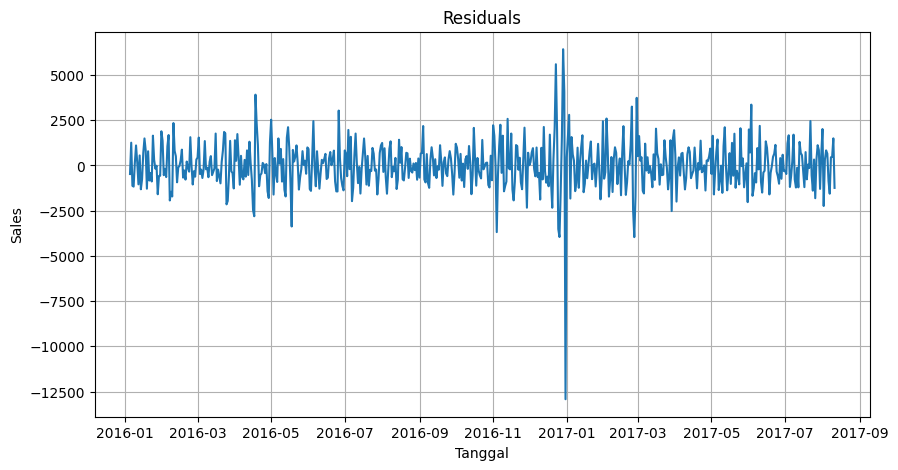

In [ ]:
residuals = plot_decompose.resid.dropna()
plt.figure(figsize=(10, 5))
plt.plot(residuals)
plt.title('Residuals')
plt.xlabel('Tanggal')
plt.ylabel('Sales')
plt.grid(True)
plt.show()

data sudah siap digunakan berdasarkan cek stationer data dan residu

## menentukan d,p,q yang mau dipake

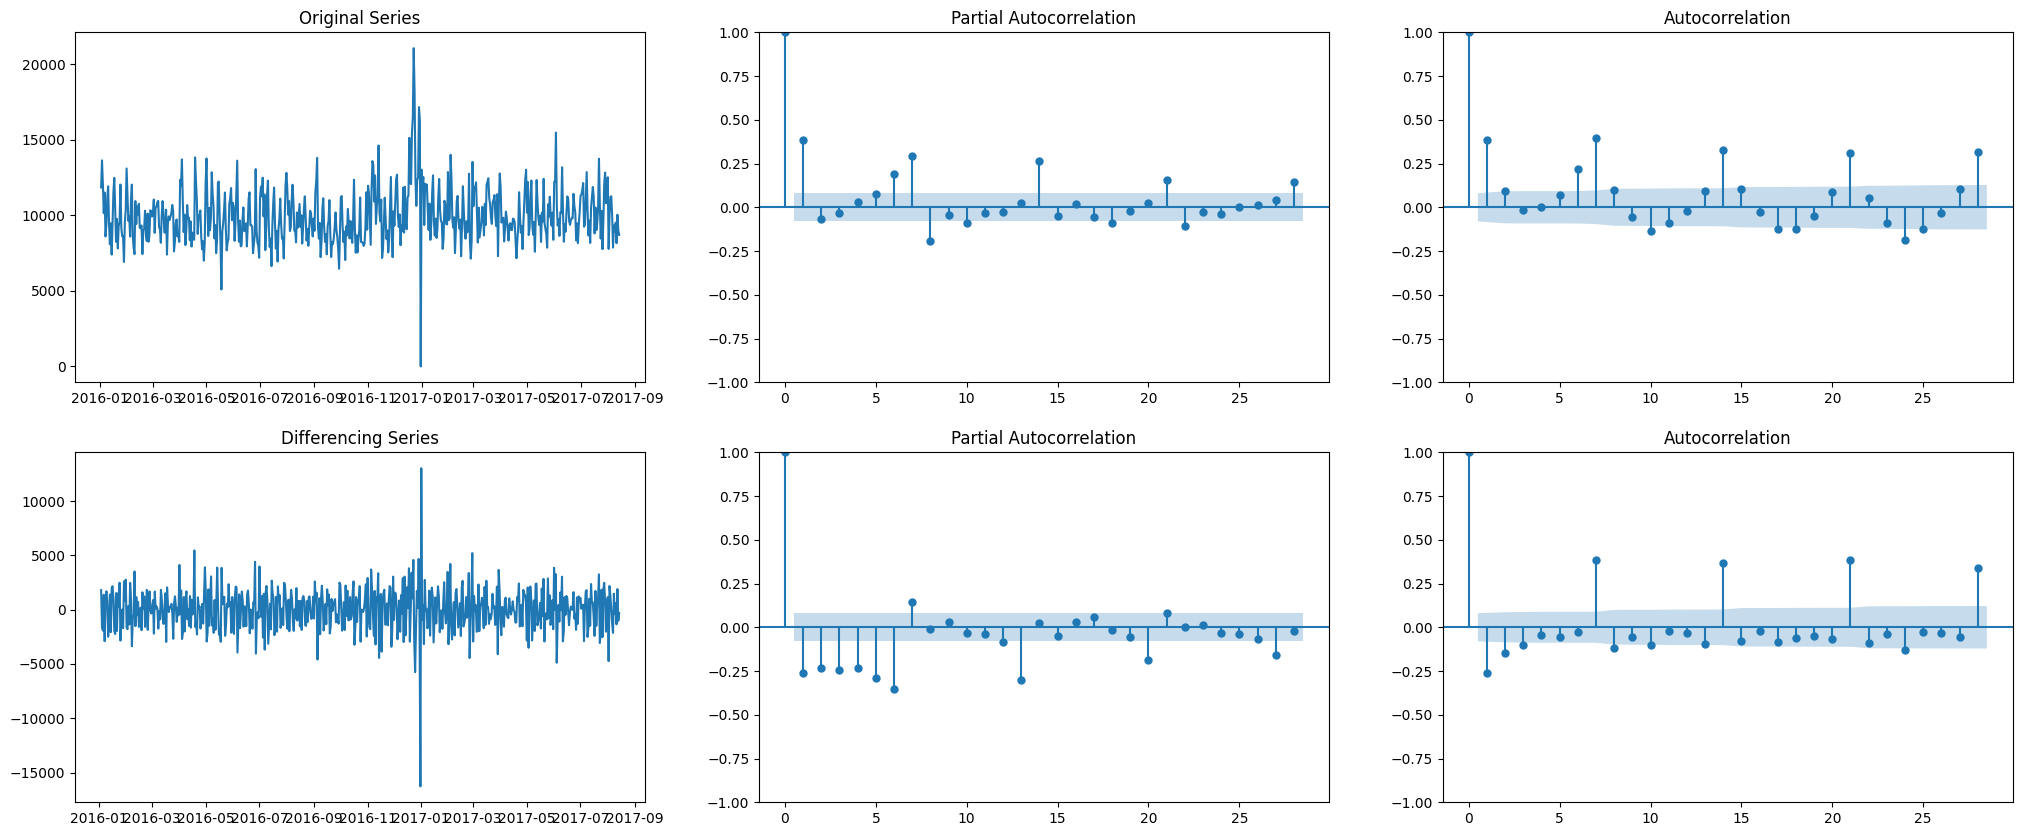

In [ ]:
# Plot ACF dan PACF
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
fig, ax = plt.subplots(2, 3, figsize=(25, 10))

#ujicoba saat d nya 0, atau original tanpa differencing
ax[0, 0].set_title('Original Series') # tidak ada differencing
ax[0, 0].plot(df_case1['sales'])
ax[0, 1] = plot_pacf(df_case1['sales'], ax=ax[0, 1])
ax[0, 2] = plot_acf(df_case1['sales'], ax=ax[0, 2])
# saat di cek dia masih ada pola, dimana menandakan tidak bagus.

ax[1, 0].set_title('Differencing Series')
ax[1, 0].plot(df_case1['sales'].diff().dropna())
ax[1, 1] = plot_pacf(df_case1['sales'].diff().dropna(), ax=ax[1, 1])
ax[1, 2] = plot_acf(df_case1['sales'].diff().dropna(), ax=ax[1, 2])
# sudah tidka menentu pola tertentu


plt.show()


kalau pake sarima artinya
dari PACF p = 1 karena yang 2 sudah masuk ke biru
dari ACF q = 1
seasonalnya = 7
d = 0 (no differencing)

## Modelling

In [ ]:
# split secara ordinal
train = df_case1['sales'][:len(df_case1)-30]
test = df_case1['sales'][len(df_case1)-30:] # 30 terakhir sampe terakhirnya
test

2017-07-16    11222.819999
2017-07-17     8804.440991
2017-07-18    10524.570020
2017-07-19     9021.898000
2017-07-20     9480.547000
2017-07-21    10501.994000
2017-07-22    13749.103000
2017-07-23    10674.688000
2017-07-24     8460.934000
2017-07-25    10294.048000
2017-07-26     7759.330100
2017-07-27     9643.469999
2017-07-28    12108.967000
2017-07-29    12830.420000
2017-07-30    10798.739000
2017-07-31    11373.361000
2017-08-01    12519.385000
2017-08-02     7775.381000
2017-08-03     9944.972000
2017-08-04    11221.937000
2017-08-05    11264.564000
2017-08-06    10011.661000
2017-08-07     7868.124990
2017-08-08     9326.658000
2017-08-09     8910.066000
2017-08-10     9510.871000
2017-08-11     8157.070000
2017-08-12    10044.821000
2017-08-13     9011.574900
2017-08-14     8703.693000
Freq: D, Name: sales, dtype: float64

## Sarima (p,d,q)

In [ ]:
#seasonal arima model

modelcase1 = ARIMA(train, order=(1,0,1), seasonal_order=(1,0,1,7))
model_fitcase1 = modelcase1.fit()
print(model_fitcase1.summary())

                                    SARIMAX Results                                    
Dep. Variable:                           sales   No. Observations:                  561
Model:             ARIMA(1, 0, 1)x(1, 0, 1, 7)   Log Likelihood               -4868.657
Date:                         Fri, 21 Jun 2024   AIC                           9749.314
Time:                                 03:14:00   BIC                           9775.292
Sample:                             01-02-2016   HQIC                          9759.457
                                  - 07-15-2017                                         
Covariance Type:                           opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       9955.4882    541.025     18.401      0.000    8895.099     1.1e+04
ar.L1          0.4332      0.051      8.416      0.000     

secara teori
Nilai yang penting :
- AIC (Akaike Information Criterion): Nilai AIC digunakan untuk membandingkan kebaikan model, di mana nilai yang lebih rendah menunjukkan model yang lebih baik. Jadi, semakin kecil nilai AIC, semakin baik modelnya.

- BIC (Bayesian Information Criterion): Seperti AIC, nilai BIC juga digunakan untuk membandingkan kebaikan model, di mana nilai yang lebih rendah menunjukkan model yang lebih baik. Jadi, semakin kecil nilai BIC, semakin baik modelnya.

- Ljung-Box (Q): Uji Ljung-Box digunakan untuk mengevaluasi apakah ada autocorrelation pada residual model. P-value yang tinggi (misalnya,prob Q > 0.05) menunjukkan tidak adanya bukti signifikan untuk autocorrelation residual. Jadi, Anda ingin memastikan bahwa p-value untuk uji ini tinggi.

- Jarque-Bera (JB): Uji Jarque-Bera digunakan untuk mengevaluasi apakah residual model memiliki distribusi normal. P-value yang tinggi (misalnya, prob jb> 0.05) menunjukkan tidak adanya bukti signifikan untuk ketidaknormalan pada residual. Jadi, Anda ingin memastikan bahwa p-value untuk uji ini tinggi.

Uji ljung box dan jarque-bera memenuhi standar dan Heteroskedasticity menunjukkan bahwa tidak ada bukti yang signifikan untuk heteroskedastisitas,

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


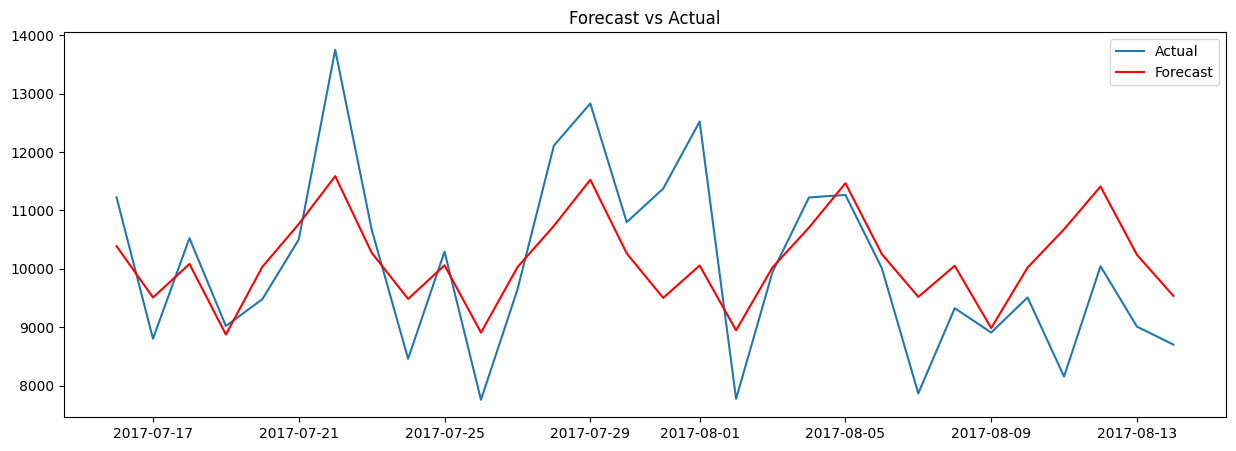

In [ ]:
# predict

forecast = model_fitcase1.predict(start=len(train), end=len(train)+len(test)-1, typ='levels')
forecast.index = test.index

plt.figure(figsize=(15,5))
plt.title('Forecast vs Actual')
plt.plot(test, label='Actual')
plt.plot(forecast, label='Forecast', color='r')
plt.legend()

secara model dari linechart ini sudah cukup baik karena tidak over confident maupun under setelah ini perlu dicek yang lainnya yaitu cek forecast

### Cek forecast

In [ ]:
forecastSARIMA = pd.DataFrame({'test': test, 'forecast': forecast})
forecastSARIMA

,test,forecast
2017-07-16,11222.819999,10387.355762
2017-07-17,8804.440991,9509.965530
2017-07-18,10524.570020,10083.469177
2017-07-19,9021.898000,8876.091068
2017-07-20,9480.547000,10034.239741
2017-07-21,10501.994000,10767.179090
2017-07-22,13749.103000,11586.445586
2017-07-23,10674.688000,10276.007974
2017-07-24,8460.934000,9485.536807
2017-07-25,10294.048000,10060.804277


### Cek % ACC

In [ ]:
def akurasi(actual,forecast):
  if actual >= forecast:
    return forecast/actual
  else:
    return actual/forecast

forecastSARIMA['accuracy'] = forecastSARIMA.apply(lambda row : akurasi(row['test'], row['forecast']), axis=1)
forecastSARIMA['accuracy'].mean()*100

91.66845872540705

Sudah memiliki akurasi yang cukup bagus, dengan 91% accuracy

### Cek MAE (Mean Absolute Error)

In [ ]:
# mean absolute error

mape = mean_absolute_percentage_error(forecastSARIMA['test'],forecastSARIMA['forecast'])
print(f"Mean absolute percentage: {round(mape * 100, 2)}%")

Mean absolute percentage: 9.07%


## Model LSTM

### Model

In [ ]:
# Spli data dan scalling
scaler = MinMaxScaler()
train.head(), test.head()

(2016-01-02    11846.41898
 2016-01-03    13640.98700
 2016-01-04    12064.41598
 2016-01-05    10143.74800
 2016-01-06    11509.64700
 Freq: D, Name: sales, dtype: float64,
 2017-07-16    11222.819999
 2017-07-17     8804.440991
 2017-07-18    10524.570020
 2017-07-19     9021.898000
 2017-07-20     9480.547000
 Freq: D, Name: sales, dtype: float64)

In [ ]:
trainLSTM = train.values.reshape(-1, 1)
testLSTM = test.values.reshape(-1, 1)

scaler.fit(trainLSTM)
# reshape the data
scaled_train = scaler.transform(trainLSTM)
scaled_test = scaler.transform(testLSTM)

In [ ]:
scaled_train[:10]

array([[0.56225776],
       [0.647432  ],
       [0.57260439],
       [0.48144515],
       [0.5462738 ],
       [0.40822997],
       [0.44830473],
       [0.52833715],
       [0.56577746],
       [0.44742483]])

In [ ]:
# untuk 12 bulan
n_input = 7 #dicoba karena seasonalnya 7
n_features = 1 #univariate
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

# define model, disini kita hanya pake 1 layer, dan dense itu terakhir karena regresi
model = Sequential()
model.add(LSTM(50, input_shape=(n_input, n_features))) # 1 layer sederhana
model.add(Dense(1)) # karena regresi
model.compile(optimizer='adam', loss='mse')

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 50)                10400     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 10451 (40.82 KB)
Trainable params: 10451 (40.82 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# fit model
model.fit(generator, epochs=50)
# sudah coba epochs 10, dan 70 namun di angka 71%.

Epoch 1/50
554/554 [==============================] - 4s 4ms/step - loss: 0.0109
Epoch 2/50
554/554 [==============================] - 2s 4ms/step - loss: 0.0073
Epoch 3/50
554/554 [==============================] - 2s 4ms/step - loss: 0.0071
Epoch 4/50
554/554 [==============================] - 3s 5ms/step - loss: 0.0071
Epoch 5/50
554/554 [==============================] - 3s 5ms/step - loss: 0.0071
Epoch 6/50
554/554 [==============================] - 2s 4ms/step - loss: 0.0066
Epoch 7/50
554/554 [==============================] - 2s 4ms/step - loss: 0.0062
Epoch 8/50
554/554 [==============================] - 2s 4ms/step - loss: 0.0058
Epoch 9/50
554/554 [==============================] - 3s 5ms/step - loss: 0.0059
Epoch 10/50
554/554 [==============================] - 2s 4ms/step - loss: 0.0059
Epoch 11/50
554/554 [==============================] - 2s 4ms/step - loss: 0.0059
Epoch 12/50
554/554 [==============================] - 2s 4ms/step - loss: 0.0060
Epoch 13/50
554/554 [====

In [ ]:
# kita prediksi
trainPredict = model.predict(scaled_train)
testPredict = model.predict(scaled_test)

# Reshape trainPredict and testPredict for plotting
trainPredict = trainPredict.reshape(-1, 1)
testPredict = testPredict.reshape(-1, 1)

# baru di inverse transform, mengembalikan data ke skala asli, butuh aktualnya
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform(scaled_train)
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform(scaled_test)

plot_predicted = testPredict.copy()
plot_predicted = plot_predicted.reshape(30, 1)
plot_actual = testY.copy()
plot_actual = plot_actual.reshape(30, 1)
# plot_predicted.reshape(30, 1): Mengubah bentuk array plot_predicted menjadi bentuk dengan 30 baris dan 1 kolom. Ini berarti array yang awalnya mungkin berbentuk (30,) atau bentuk lainnya akan diubah menjadi bentuk (30, 1).
print(plot_actual.shape)
print(plot_predicted.shape)

1/1 [==============================] - 0s 20ms/step
(30, 1)
(30, 1)


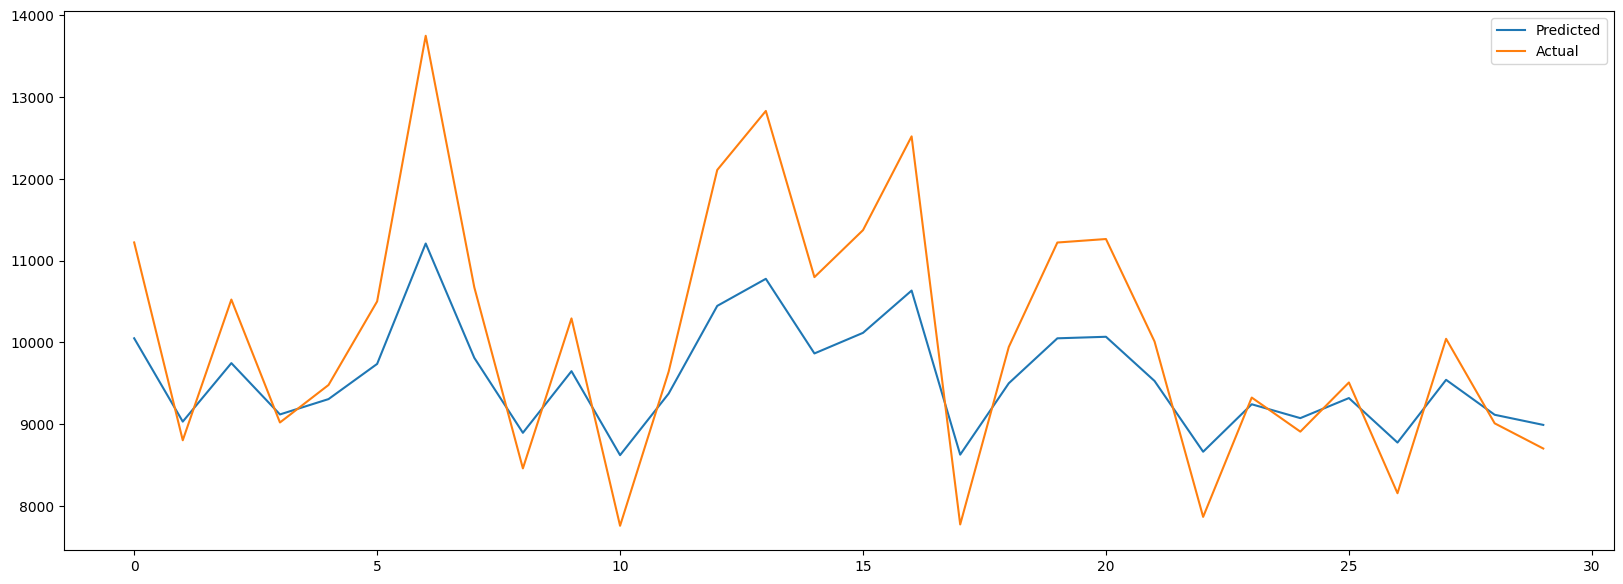

In [ ]:
plt.figure(figsize=(20,7))
plt.plot(pd.DataFrame(plot_predicted), label='Predicted')
plt.plot(pd.DataFrame(plot_actual), label='Actual')
plt.legend(loc='best')
plt.show()
# datanya underconfident

In [ ]:
# Input into pandas dataframe, test as index and plot_predicted as the column
# Reshape the data plot_predicted
plot_predicted = plot_predicted.reshape(30,)

# mereshape ulang menjadi bentuk 30 baris

forecastLSTM = pd.DataFrame({'test': test, 'forecast': plot_predicted}, index=test.index)
forecastLSTM
# kita buatkan akurasinya

,test,forecast
2017-07-16,11222.819999,10051.303711
2017-07-17,8804.440991,9032.742188
2017-07-18,10524.570020,9747.614258
2017-07-19,9021.898000,9120.415039
2017-07-20,9480.547000,9307.929688
2017-07-21,10501.994000,9737.922852
2017-07-22,13749.103000,11209.651367
2017-07-23,10674.688000,9812.267578
2017-07-24,8460.934000,8895.885742
2017-07-25,10294.048000,9649.025391


### Accuracy LSTM

In [ ]:
forecastLSTM['accuracy'] = forecastLSTM.apply(lambda row : akurasi(row['test'], row['forecast']), axis=1)
forecastLSTM['accuracy'].mean()
#pake akurasi

0.928005169374422

lebih besar 1% dari SARIMA

Jadi menggunakan LSTM

## Model LSTM Hyperparameter tunning menggunakan random search

In [ ]:
from keras.preprocessing.sequence import TimeseriesGenerator

In [ ]:
from keras.wrappers.scikit_learn import KerasRegressor #berfungsi untuk mmembungkus fungsi sehingga dapat digunakan scikit-learn
from sklearn.model_selection import RandomizedSearchCV


# untuk 12 bulan
n_input = 7 #dicoba karena seasonalnya 7
n_features = 1 #univariate
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

# define model,  dan dense itu terakhir karena regresi
def create_model (units=50, optimizer='adam'):
  model = Sequential()
  model.add(LSTM(50, input_shape=(n_input, n_features))) # 1 layer sederhana
  model.add(Dense(1)) # karena regresi
  model.compile(optimizer=optimizer, loss='mse')
  return model

#Membungkus model dengan kerasRegressor
model = KerasRegressor(build_fn=create_model, verbose=0)

#Hyperparameter yang akan diuji
parameter_tuning = {'units': [30,50,100,150], 'optimizer': ['adam', 'rmsprop'], 'batch_size': [1,3,5,10], 'epochs': [45,50,60,90]}

#random search
random_search = RandomizedSearchCV(estimator=model, param_distributions=parameter_tuning, n_iter=10, cv=3, verbose=2, n_jobs=-1)
random_search_result = random_search.fit(generator)

#cek yang best parameter
print("Best: %f using %s" % (random_search_result.best_score_, random_search_result.best_params_))


In [ ]:

model.summary()
# fit model
model.fit(generator, epochs=50)
# sudah coba epochs 10, dan 70 namun di angka 71%.
# kita prediksi
trainPredict = model.predict(scaled_train)
testPredict = model.predict(scaled_test)

# Reshape trainPredict and testPredict for plotting
trainPredict = trainPredict.reshape(-1, 1)
testPredict = testPredict.reshape(-1, 1)

# baru di inverse transform, mengembalikan data ke skala asli, butuh aktualnya
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform(scaled_train)
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform(scaled_test)

plot_predicted = testPredict.copy()
plot_predicted = plot_predicted.reshape(30, 1)
plot_actual = testY.copy()
plot_actual = plot_actual.reshape(30, 1)
# plot_predicted.reshape(30, 1): Mengubah bentuk array plot_predicted menjadi bentuk dengan 30 baris dan 1 kolom. Ini berarti array yang awalnya mungkin berbentuk (30,) atau bentuk lainnya akan diubah menjadi bentuk (30, 1).
print(plot_actual.shape)
print(plot_predicted.shape)

plt.figure(figsize=(20,7))
plt.plot(pd.DataFrame(plot_predicted), label='Predicted')
plt.plot(pd.DataFrame(plot_actual), label='Actual')
plt.legend(loc='best')
plt.show()
# datanya underconfident

# Input into pandas dataframe, test as index and plot_predicted as the column
# Reshape the data plot_predicted
plot_predicted = plot_predicted.reshape(30,)

# mereshape ulang menjadi bentuk 30 baris

forecastLSTM = pd.DataFrame({'test': test, 'forecast': plot_predicted}, index=test.index)
forecastLSTM
# kita buatkan akurasinya

### akurasi LSTM Hyperparameter

In [ ]:
forecastLSTM['accuracy'] = forecastLSTM.apply(lambda row : akurasi(row['test'], row['forecast']), axis=1)
forecastLSTM['accuracy'].mean()
#pake akurasi

## Uji Metrik

## R2Squared forecastARIMA dan forecastLSTM

R2 Score

In [ ]:
r2_scoreARIMA = metrics.r2_score(forecastSARIMA['test'], forecastSARIMA['forecast'])
print('R2 Score ARIMA:', r2_scoreARIMA)
r2_scoreLSTM = metrics.r2_score(forecastLSTM['test'], forecastLSTM['forecast'])
print('R2 Score LSTM:', r2_scoreLSTM)

R2 Score ARIMA: 0.4410427864753773
R2 Score LSTM: 0.5679059428191744


R2 scorenya lebih baik yang LSTM, karena lebih besar. yang berarti kemampuan prediksi model LSTM nya lebih baik.

RMSE

In [ ]:
mseSARIMA = mean_squared_error(forecastSARIMA['test'], forecastSARIMA['forecast'])
print('MSE SARIMA:+-', mseSARIMA)
mseLSTM = mean_squared_error(forecastLSTM['test'], forecastLSTM['forecast'])
print('MSE LSTM:+-', mseLSTM)

MSE SARIMA:+- 1277613.0338716866
MSE LSTM:+- 987640.8890613631


In [ ]:
rmse = np.sqrt(mseSARIMA)
print('RMSE SARIMA:+-', rmse)
rmse = np.sqrt(mseLSTM)
print('RMSE LSTM:+-', rmse)

RMSE SARIMA:+- 1130.315457680592
RMSE LSTM:+- 993.8012321693725


sehingga RMSE LSTM plus minus dari target aktual sebesar 951

MAPE

In [ ]:
# MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mapeSARIMA = mean_absolute_percentage_error(forecastSARIMA['test'], forecastSARIMA['forecast'])
print('MAPE SARIMA:', mapeSARIMA)
mapeLSTM = mean_absolute_percentage_error(forecastLSTM['test'], forecastLSTM['forecast'])
print('MAPE LSTM:', mapeLSTM)

MAPE SARIMA: 9.07492337725663
MAPE LSTM: 7.337756364339492


Errornya LSTM 8.6%

MASE

In [ ]:
# MASE
def mean_absolute_scaled_error(training_series, testing_series, prediction_series):
    n = training_series.shape[0]
    d = np.abs(  np.diff( training_series) ).sum()/(n-1)
    errors = np.abs(testing_series - prediction_series )
    return errors.mean()/d

maseSARIMA = mean_absolute_scaled_error(train, test, forecastSARIMA['forecast'])
print('MASE SARIMA:', maseSARIMA)
maseLSTM = mean_absolute_scaled_error(train, test, forecastLSTM['forecast'])
print('MASE LSTM:', maseLSTM)

MASE SARIMA: 0.6038176996997918
MASE LSTM: 0.5262418433867707


## Note dan Catatan


Berdasarkan keempat matriks R2 score, RMSE, MAE, dan MASE didapatkan bahwa model LSTM memiliki akurasi dan prediksi yang lebih baik, namun kalau secara performa model LSTM memiliki performa yang lebih berat
LSTM = 93%
Acc = 91%

catatan untuk pembelajaran dan improvement yang belum dilakukan:
- residual model yang prob jb masih <0.05, sehingga menunjukkan maish ada bukti signifikan ketidak normalan pada residual, apakah perlu differencing 2x?
- berdasarkan total sales penjualan per tahun dari 2013 hingga 2017 berdasarkan grafik ada kemungkinan trend naik, apakah perlu untuk di analisis?
- untuk LSTM masih underconfident

akurasinya lebih rendah hal ini dikarenakan data masih tidak stationer dilihat dari adfuller dan kpssnya